<a href="https://colab.research.google.com/github/bhargav23/AI/blob/master/AlexNet/Fashion_Mnist_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 149, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 149 (delta 77), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (149/149), 943.24 KiB | 394.00 KiB/s, done.
Resolving deltas: 100% (77/77), done.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [5]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((227, 227)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((227, 227)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 227, 227])
torch.Size([512])


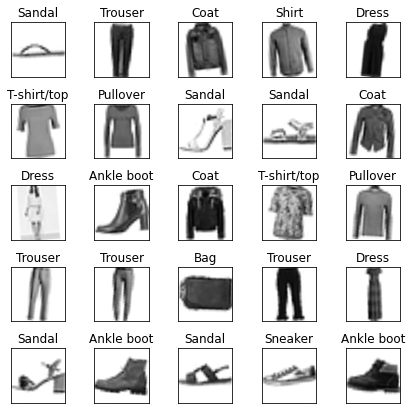

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [7]:
import alexnet
net = alexnet.AlexNet()

In [8]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 227, 227))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]           7,808
              ReLU-2           [-1, 64, 56, 56]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-

In [10]:
import evascheduler

In [11]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.2947006225585938 Batch_id=117 Accuracy=13.43: 100%|██████████| 118/118 [01:18<00:00,  1.51it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.8043, Accuracy: 1957/10000 (19.57%)

EPOCH: 1


Loss=0.9476500153541565 Batch_id=117 Accuracy=31.30: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.3481, Accuracy: 6519/10000 (65.19%)

EPOCH: 2


Loss=0.6498569250106812 Batch_id=117 Accuracy=73.53: 100%|██████████| 118/118 [01:16<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.2197, Accuracy: 7803/10000 (78.03%)

EPOCH: 3


Loss=0.5648308396339417 Batch_id=117 Accuracy=79.20: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1831, Accuracy: 8169/10000 (81.69%)

EPOCH: 4


Loss=0.5332195162773132 Batch_id=117 Accuracy=81.94: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1700, Accuracy: 8300/10000 (83.00%)

EPOCH: 5


Loss=0.659582793712616 Batch_id=117 Accuracy=83.75: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1626, Accuracy: 8374/10000 (83.74%)

EPOCH: 6


Loss=0.4032568633556366 Batch_id=117 Accuracy=85.28: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1433, Accuracy: 8567/10000 (85.67%)

EPOCH: 7


Loss=0.4048207700252533 Batch_id=117 Accuracy=85.66: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1426, Accuracy: 8574/10000 (85.74%)

EPOCH: 8


Loss=0.4057789146900177 Batch_id=117 Accuracy=85.96: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1407, Accuracy: 8593/10000 (85.93%)

EPOCH: 9


Loss=0.3846798837184906 Batch_id=117 Accuracy=86.10: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1404, Accuracy: 8596/10000 (85.96%)

EPOCH: 10


Loss=0.23171131312847137 Batch_id=117 Accuracy=86.17: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1358, Accuracy: 8642/10000 (86.42%)

EPOCH: 11


Loss=0.4038199484348297 Batch_id=117 Accuracy=86.38: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1427, Accuracy: 8573/10000 (85.73%)

EPOCH: 12


Loss=0.16841058433055878 Batch_id=117 Accuracy=86.52: 100%|██████████| 118/118 [01:16<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1360, Accuracy: 8640/10000 (86.40%)

EPOCH: 13


Loss=0.388115793466568 Batch_id=117 Accuracy=86.47: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1357, Accuracy: 8643/10000 (86.43%)

EPOCH: 14


Loss=0.31176337599754333 Batch_id=117 Accuracy=86.66: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1362, Accuracy: 8638/10000 (86.38%)

EPOCH: 15


Loss=0.3901015520095825 Batch_id=117 Accuracy=86.54: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1358, Accuracy: 8642/10000 (86.42%)

EPOCH: 16


Loss=0.2510065734386444 Batch_id=117 Accuracy=86.64: 100%|██████████| 118/118 [01:16<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1355, Accuracy: 8645/10000 (86.45%)

EPOCH: 17


Loss=0.4490203857421875 Batch_id=117 Accuracy=86.65: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1359, Accuracy: 8641/10000 (86.41%)

EPOCH: 18


Loss=0.3607674539089203 Batch_id=117 Accuracy=86.58: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1362, Accuracy: 8638/10000 (86.38%)

EPOCH: 19


Loss=0.3994883596897125 Batch_id=117 Accuracy=86.48: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]



Test set: Average loss: 0.1359, Accuracy: 8641/10000 (86.41%)



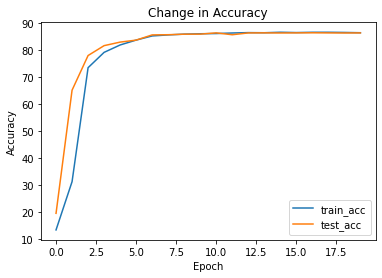

In [12]:
from evascheduler import draw_graph
draw_graph()

In [13]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [14]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


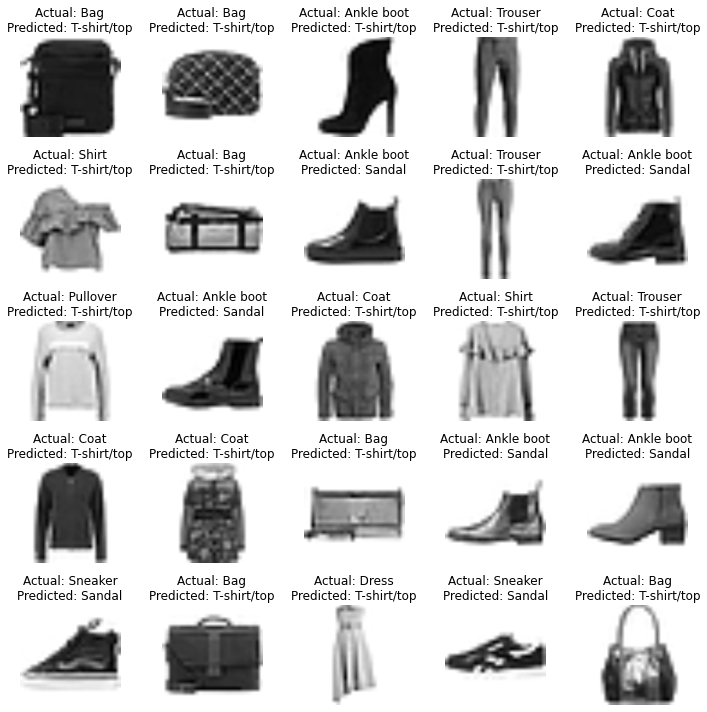

In [15]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")